<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/SVM_on_Nakuru_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio scikit-learn numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 22.8 MB/s eta 0:00:00


In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
def mount_google_drive():
  drive.mount('/content/drive')

In [ ]:
def load_geotiff(filepath):
  with rasterio.open(filepath) as src:
    shape=src.shape
    data=src.read(1).flatten()
    return data, shape



In [ ]:
def load_geotiff_data(geotiff_dir):
  files=[os.path.join(geotiff_dir, f)for f in os.listdir(geotiff_dir) if f.endswith('.tif')]
  data_arrays=[]
  shapes=[]

  for file in files:
    data, shape=load_geotiff(file)
    data_arrays.append(data)
    shapes.append(shape)

  if not all (shape==shapes[0] for shape in shapes):
    raise ValueError("All GEOTIFF files must have the same dimensions")

  return np.column_stack(data_arrays), list(map(lambda x: os.path.basename(x).split('.')[0], files)), shapes[0]

In [ ]:
def preprocess_data(features):
  imputer=SimpleImputer(strategy='mean')
  features_imputed=imputer.fit_transform(features)

  scaler=StandardScaler()
  features_normalized=scaler.fit_transform(features_imputed)

  return features_normalized

In [ ]:
def train_svm_model(X_train, y_train):
  svm_model=SVC(kernel='rbf', C=1.0, gamma='scale')
  svm_model.fit(X_train, y_train)
  return svm_model

In [ ]:
def evaluate_model(svm_model, X_test, y_test):
  y_pred=svm_model.predict(X_test)

  accuracy=accuracy_score(y_test, y_pred)
  classification_rep=classification_report(y_test, y_pred)

  return{
      'accuracy': accuracy,
      'classification_report': classification_rep,
      'predictions': y_pred
  }

In [ ]:
def visualize_predictions(model, features_normalized, original_shape):

  all_predictions=model.predict(features_normalized)


  predicted_map=all_predictions.reshape(original_shape)

  plt.figure(figsize=(10, 8))
  plt.imshow(predicted_map, cmap='viridis')
  plt.colorbar(label='Climate Zones')
  plt.title('Predicted Climate Zones')
  plt.tight_layout()
  plt.show()

In [ ]:
def main():
  geotiff_dir='/content/drive/MyDrive/Cvs in RS/'
  labels_filepath='/content/drive/MyDrive/Cvs in RS/label.tif'

  mount_google_drive()

  features, feature_names, original_shape=load_geotiff_data(geotiff_dir)

  labels, _ =load_geotiff(labels_filepath)

  features_normalized=preprocess_data(features)

  X_train, X_test, y_train, y_test=train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

  svm_model=train_svm_model(X_train, y_train)

  results=evaluate_model(svm_model, X_test, y_test)
  print("Accuracy:", results['accuracy'])
  print('Classification Report:\n', results['classification_report'])

  visualize_predictions(svm_model, features_normalized, original_shape)


Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9977638099842863
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10368
           3       1.00      0.50      0.67         4
           6       0.96      0.99      0.97        72
           8       0.00      0.00      0.00         3
           9       0.99      0.99      0.99       520
          11       0.99      0.99      0.99       581
          12       1.00      1.00      1.00      1853
          13       1.00      0.98      0.99       494
          14       0.99      1.00      1.00      2358
          15       0.00      0.00      0.00         1
          16       0.99      1.00      0.99        85
          17       1.00      0.99      0.99       207

    accuracy                           1.00     16546
   macro avg       0.83      0.79      0.80     16546
weighted avg       1.00      1.00      1.00     16546



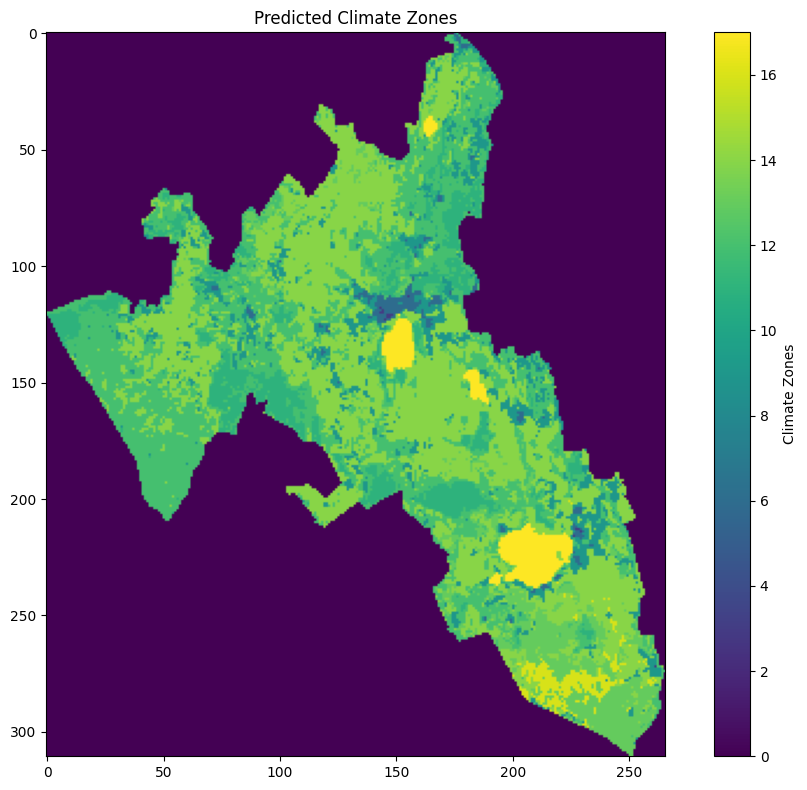

In [ ]:
if __name__=="__main__":
  main()